In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/jyotinarang2/Speech_Music_Classification/master/gtzan_features.csv')

In [44]:
df.head()

,RMS,Spectral Slope,Zero Crossings,MFCC(2),Spectral RollOff,MFCC(4),MFCC(13),MFCC(11),MFCC(1),MFCC(12),Spectral Spread,Class
0,-20.187,-9.740000e-07,0.075458,2.2779,493,1.24320,0.095795,-0.128390,-25.954,-0.017165,616.68,'music'
1,-16.315,-2.270000e-06,0.098657,2.9004,462,0.36602,-0.339310,-0.050032,-22.565,-0.726760,878.82,'speech'
2,-21.369,-5.690000e-07,0.044689,2.3677,1184,0.75089,0.198910,0.214620,-27.885,0.434850,597.75,'music'
3,-17.724,-1.230000e-06,0.116730,1.8504,1170,0.72793,0.125660,0.197170,-23.188,0.333370,1250.10,'music'
4,-29.913,-4.980000e-07,0.094017,2.3898,561,1.44410,0.631700,-0.117360,-26.718,-0.440910,1015.50,'speech'


In [5]:
df.columns

Index(['RMS', 'Spectral Slope', 'Zero Crossings', 'MFCC(2)',
       'Spectral RollOff', 'MFCC(4)', 'MFCC(13)', 'MFCC(11)', 'MFCC(1)',
       'MFCC(12)', 'Spectral Spread', 'Class'],
      dtype='object')

In [45]:
msx = df.drop('Class',axis=1).values
msy = df['Class'].values

In [85]:
msx

array([[-2.0187e+01, -9.7400e-07,  7.5458e-02, ..., -2.5954e+01,
        -1.7165e-02,  6.1668e+02],
       [-1.6315e+01, -2.2700e-06,  9.8657e-02, ..., -2.2565e+01,
        -7.2676e-01,  8.7882e+02],
       [-2.1369e+01, -5.6900e-07,  4.4689e-02, ..., -2.7885e+01,
         4.3485e-01,  5.9775e+02],
       ...,
       [-2.4526e+01, -2.3300e-08,  3.9096e-01, ..., -2.7066e+01,
         7.2594e-02,  5.0223e+03],
       [-1.6852e+01, -1.0500e-06,  1.7680e-01, ..., -2.2962e+01,
        -2.9347e-01,  2.7375e+03],
       [-1.1207e+01, -2.5100e-06,  5.9096e-02, ..., -2.2527e+01,
         7.6531e-02,  7.0382e+02]])

In [46]:
le = LabelEncoder()

In [47]:
msy = le.fit_transform(msy)

In [48]:
msy

array([0, 1, 0, ..., 1, 1, 1])

In [49]:
scaler = Normalizer()

In [50]:
X_train,X_test,y_train,y_test = train_test_split(msx,msy,test_size=0.2,random_state=101)

In [51]:
scaler.fit(X_train)

Normalizer(copy=True, norm='l2')

In [52]:
X_train = scaler.transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
X_train.shape

(33075, 11)

In [55]:
X_test.shape

(8269, 11)

In [56]:
y_train.shape

(33075,)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [71]:
model = Sequential()
model.add(Dense(600,input_shape=(11,),activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=100,epochs=200)

Epoch 1/200
331/331 [==============================] - 1s 3ms/step - loss: 0.6820 - val_loss: 0.6734
Epoch 2/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6721 - val_loss: 0.6682
Epoch 3/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6676 - val_loss: 0.6646
Epoch 4/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6643 - val_loss: 0.6621
Epoch 5/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6629 - val_loss: 0.6598
Epoch 6/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6601 - val_loss: 0.6581
Epoch 7/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6591 - val_loss: 0.6560
Epoch 8/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6571 - val_loss: 0.6546
Epoch 9/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6554 - val_loss: 0.6526
Epoch 10/200
331/331 [==============================] - 1s 2ms/step - loss: 0.6539 - val_lo

In [72]:
losses = pd.DataFrame(model.history.history)

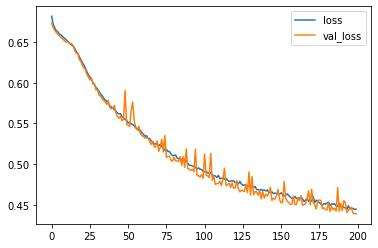

In [73]:
losses.plot()

In [61]:
predictions = model.predict_classes(X_test)

In [79]:
predictions[:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [80]:
y_test[:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [77]:
print(sklearn.metrics.accuracy_score(predictions,y_test))

0.7570443826339339
